<a href="https://colab.research.google.com/github/EAFIT-BI/Programming-for-Business-2025-I/blob/main/Agrupaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Montamos la unidad del google drive
from google.colab import drive
drive.mount('/content/drive')
#

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargamos las librerías habituales
import pandas as pd # Manejo de DataFrames
import numpy as np # Manejo numérico
import matplotlib.pyplot as plt # Manejo de gráficos
import seaborn as sns # Manejo de gráficos avanzados

In [ ]:
# Cargamos la primera base de datos y almacenamos
# la información en la variable "empresas"
empresas = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Programación 2025 I/Base-1000-empresas-2024.xlsx',
                         header = 4)

# Comprobamos la información
empresas.head()

,Ranking,NIT,RAZON SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES\n2023*,GANANCIA (PERDIDA) 2023,TOTAL ACTIVOS 2023,TOTAL PASIVOS 2023,TOTAL PATRIMONIO 2023,INGRESOS OPERACIONALES\n2022*,GANANCIA (PERDIDA)2022,TOTAL ACTIVOS 2022,TOTAL PASIVOS 2022,TOTAL PATRIMONIO 2022,GRUPO EN NIIF
0,1,899999068,ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,"BOGOTA, D.C.",B0610 - Extracción de petróleo crudo,Minero,1.295087e+11,1.906209e+10,1.987320e+11,1.203400e+11,7.839206e+10,1.448206e+11,3.340629e+10,2.168477e+11,1.258130e+11,9.103470e+10,GRUPO 1
1,2,900112515,REFINERIA DE CARTAGENA S.A.,SUPERSERVICIOS,Costa Atlántica,BOLIVAR,CARTAGENA,"C1921 - Coquización, fabricación de productos ...",Manufactura,3.205066e+10,3.491071e+09,3.708002e+10,1.233943e+10,2.474059e+10,2.791035e+10,2.188259e+09,4.284495e+10,1.648090e+10,2.636405e+10,NaN
2,3,890100577,AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA,SUPERTRANSPORTE,Bogotá - Cundinamarca,BOGOTA D.C.,"BOGOTA, D.C.",H5111 - Transporte aéreo nacional de pasajeros,Servicios,2.715051e+10,2.247326e+08,1.893801e+10,2.004489e+10,-1.106884e+09,2.252068e+10,-8.012136e+08,1.788697e+10,1.933365e+10,-1.446681e+09,GRUPO 1
3,4,830095213,ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,"BOGOTA, D.C.",G4661 - Comercio al por mayor de combustibles ...,Comercio,2.304828e+10,2.852735e+08,7.357710e+09,4.606666e+09,2.751045e+09,2.360319e+10,3.334115e+08,7.481575e+09,4.473300e+09,3.008276e+09,GRUPO 1
4,5,900156264,NUEVA EMPRESA PROMOTORA DE SALUD S.A.,SUPERSALUD,Bogotá - Cundinamarca,BOGOTA D.C.,"BOGOTA, D.C.",O8430 - Actividades de planes de seguridad soc...,Servicios,2.027968e+10,-3.418168e+08,6.815193e+09,6.671801e+09,1.433921e+08,1.477713e+10,1.040028e+07,5.913637e+09,5.428428e+09,4.852088e+08,GRUPO 2


In [ ]:
# Imprimimos los nombres de las columnas
empresas.columns

Index(['Ranking', 'NIT', 'RAZON SOCIAL', 'SUPERVISOR', 'REGIÓN',
       'DEPARTAMENTO DOMICILIO', 'CIUDAD DOMICILIO', 'CIIU', 'MACROSECTOR',
       'INGRESOS OPERACIONALES\n2023*', 'GANANCIA (PERDIDA) 2023',
       'TOTAL ACTIVOS 2023', 'TOTAL PASIVOS 2023', 'TOTAL PATRIMONIO 2023',
       'INGRESOS OPERACIONALES\n2022*', 'GANANCIA (PERDIDA)2022',
       'TOTAL ACTIVOS 2022', 'TOTAL PASIVOS 2022', 'TOTAL PATRIMONIO 2022',
       'GRUPO EN NIIF'],
      dtype='object')

In [ ]:
# Agrupamos por Supervisor y resumimos por Ingresos
empresas[['SUPERVISOR', 'INGRESOS OPERACIONALES\n2023*']].groupby('SUPERVISOR').mean()

,INGRESOS OPERACIONALES\n2023*
SUPERVISOR,
SUPERFINANCIERA,6.636839e+09
SUPERSALUD,1.324404e+09
SUPERSERVICIOS,2.118367e+09
SUPERSOCIEDADES,9.777610e+08
SUPERTRANSPORTE,1.344053e+09
SUPERVIGILANCIA,4.253929e+08


In [ ]:
# Agrupamos por Región y resumimos por Macrosector

empresas[['REGIÓN', 'MACROSECTOR']].groupby('REGIÓN').agg(pd.Series.mode)

,MACROSECTOR
REGIÓN,
Antioquia,Manufactura
Bogotá - Cundinamarca,Comercio
Centro - Oriente,Servicios
Centro - Sur,Comercio
Costa Atlántica,Manufactura
Costa Pacífica,Manufactura
Eje Cafetero,Manufactura
Otros,Servicios


In [ ]:
# Agrupamos por Región y resumimos por Supervisor

empresas[['REGIÓN', 'SUPERVISOR']].groupby('REGIÓN').count()

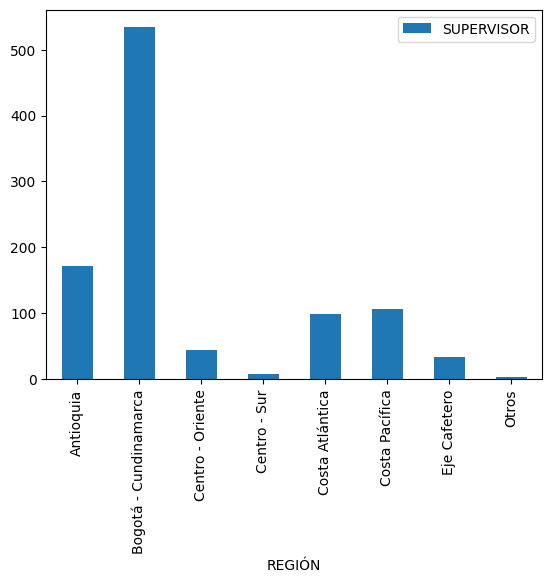

In [ ]:
# Si queremos graficar, debemos almacenar el resultado de la
# agrupación en una variable

resultado = empresas[['REGIÓN', 'SUPERVISOR']].groupby('REGIÓN').count()

# Graficamos
resultado.plot(kind = 'bar');